<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/03_44_PCA_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA EigenFaces - Part 1**

The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/dynamicslab/databook_python/blob/master/CH01/CH01_SEC06_1.ipynb


In [1]:
import os
import subprocess

# Define folder and file paths
folder_path = 'sample_data'
filename = 'allFaces.mat'
file_path = os.path.join(folder_path, filename)
file_url = 'https://github.com/kursatkara/databook_python/raw/master/DATA/allFaces.mat'

# Create folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Download file if it doesn't exist
if not os.path.exists(file_path):
    try:
        subprocess.run(f"curl -L {file_url} -o {file_path}", shell=True, check=True)
        print(f"Downloaded {filename} successfully.")
    except subprocess.CalledProcessError as e:
        print(f"Error downloading file: {e}")
else:
    print(f"{filename} already exists in {folder_path}.")

allFaces.mat already exists in sample_data.


In [2]:
# Loat the data file allFaces.mat to mat_contents.
import scipy.io

# Load the mat file from the specified folder
mat_contents = scipy.io.loadmat(file_path)


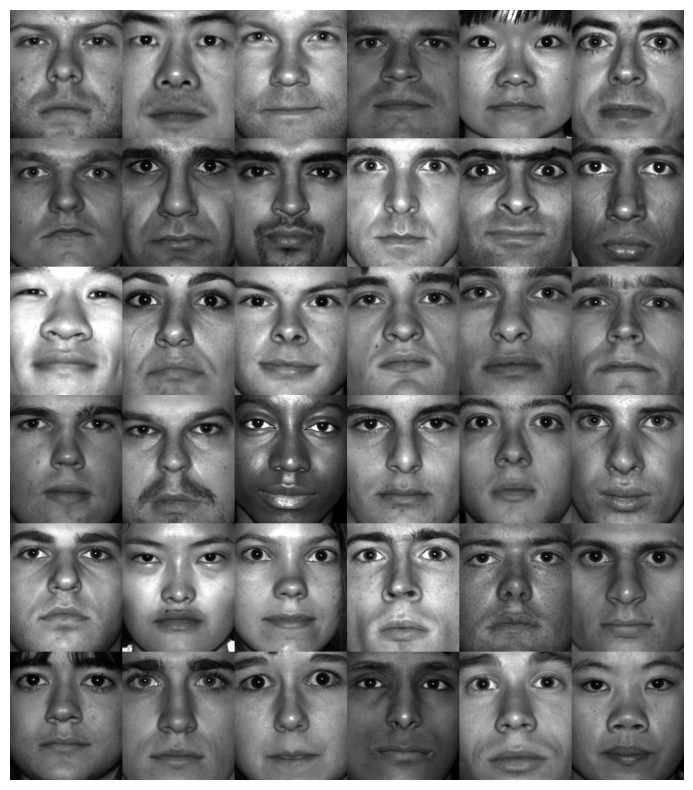

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

# Extract the necessary data
faces       = mat_contents['faces']
m           = int(np.squeeze(mat_contents['m']))
n           = int(np.squeeze(mat_contents['n']))

nfaces     = np.ndarray.flatten(mat_contents['nfaces'])
allPersons = np.zeros((n*6,m*6))
count      = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1

img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

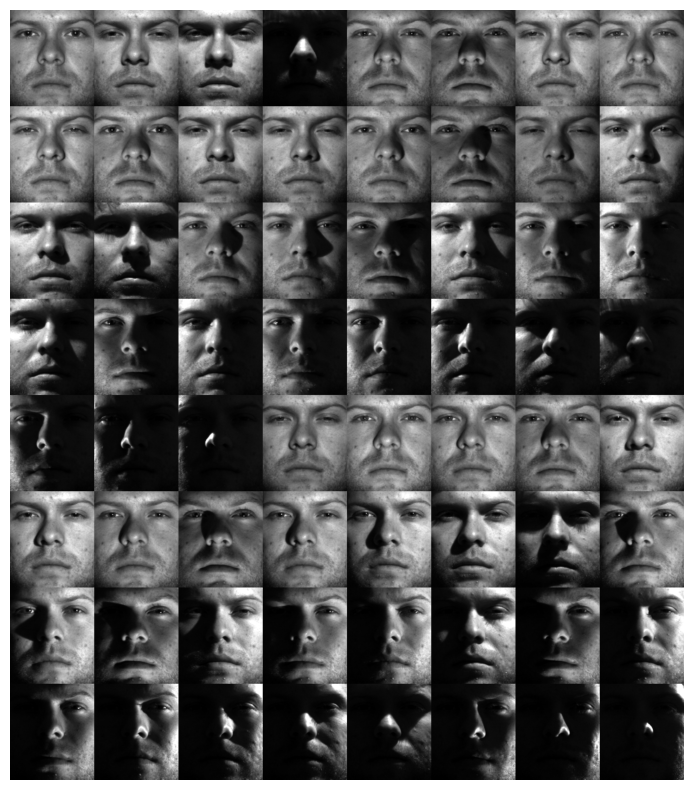

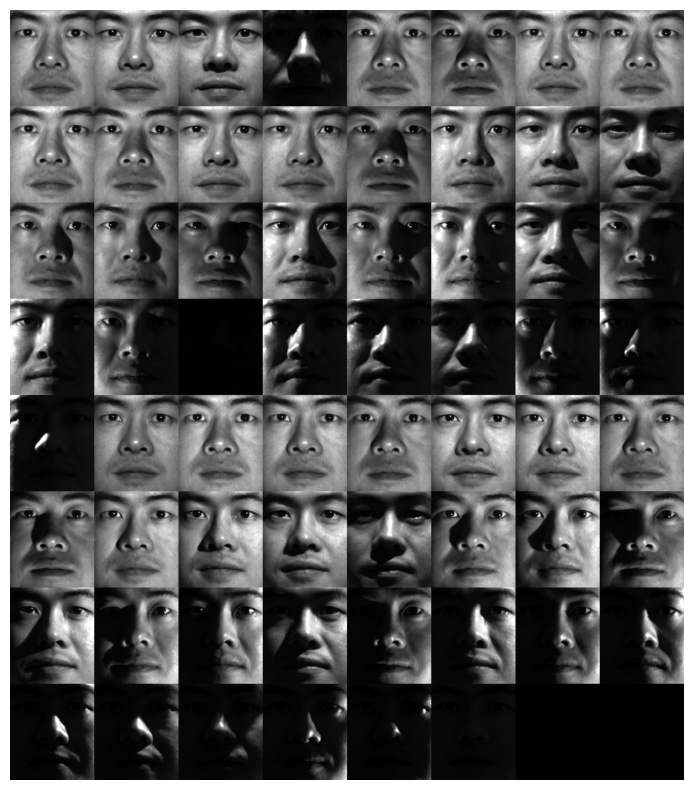

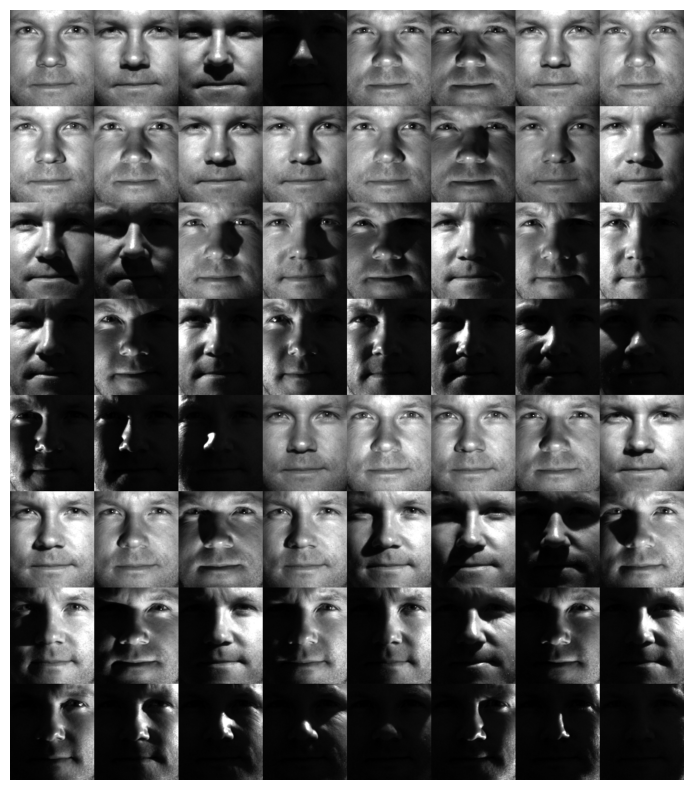

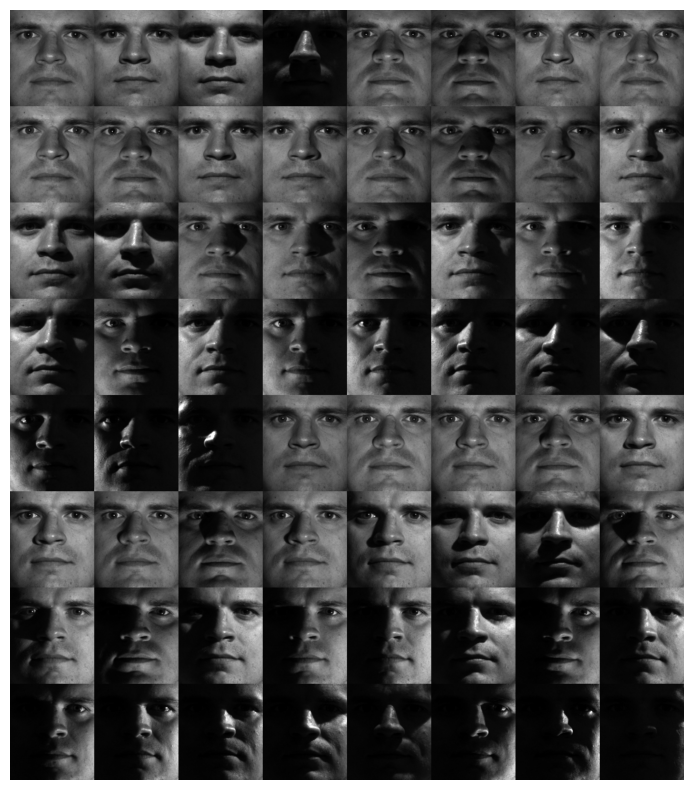

C:\Users\steph\AppData\Local\Temp\ipykernel_33764\3624221131.py:2: RuntimeWarning: overflow encountered in scalar add
  subset = faces[:,sum(nfaces[:person]) : sum(nfaces[:(person+1)])]


IndexError: index 0 is out of bounds for axis 1 with size 0

In [4]:
for person in range(len(nfaces)):
    subset = faces[:,sum(nfaces[:person]) : sum(nfaces[:(person+1)])]
    allFaces = np.zeros((n*8,m*8))

    count = 0

    for j in range(8):
        for k in range(8):
            if count < nfaces[person]:
                allFaces[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset[:,count],(m,n)).T
                count += 1

    img = plt.imshow(allFaces)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()